In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customers-dataset/Customers.csv


#  we will use this data to make customer clustering for campaigns

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
from scipy import stats
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/kaggle/input/customers-dataset/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# data preprocessing

In [4]:
df.shape

(2000, 8)

In [5]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


# data visualization

<AxesSubplot:>

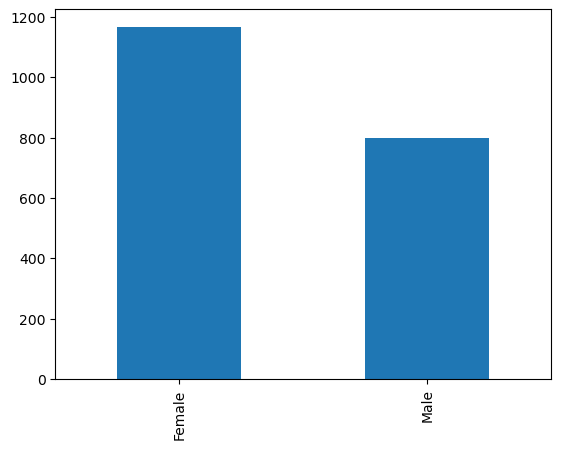

In [9]:
df['Gender'].value_counts().plot(kind='bar')

(array([182., 192., 207., 239., 193., 197., 205., 163., 197., 190.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

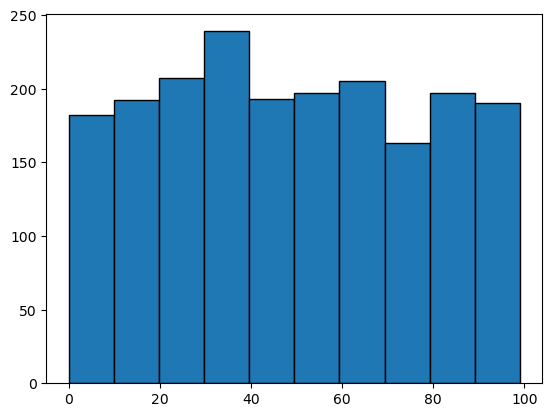

In [10]:
plt.hist(df['Age'],bins=10,edgecolor='k')

<AxesSubplot:xlabel='Annual Income ($)', ylabel='Density'>

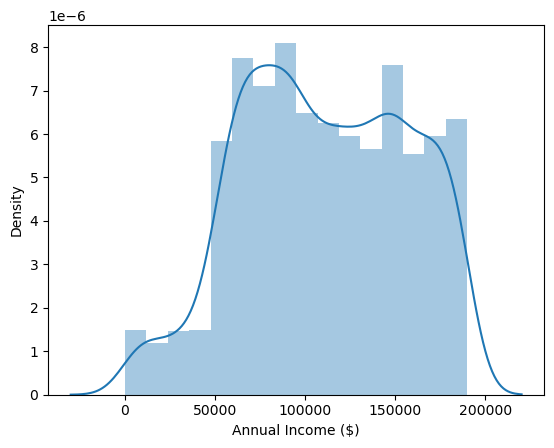

In [11]:
fig,ax=plt.subplots()
sns.distplot(df['Annual Income ($)'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Engineer'),
  Text(2, 0, 'Lawyer'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Artist'),
  Text(5, 0, 'Executive'),
  Text(6, 0, 'Doctor'),
  Text(7, 0, 'Homemaker'),
  Text(8, 0, 'Marketing')])

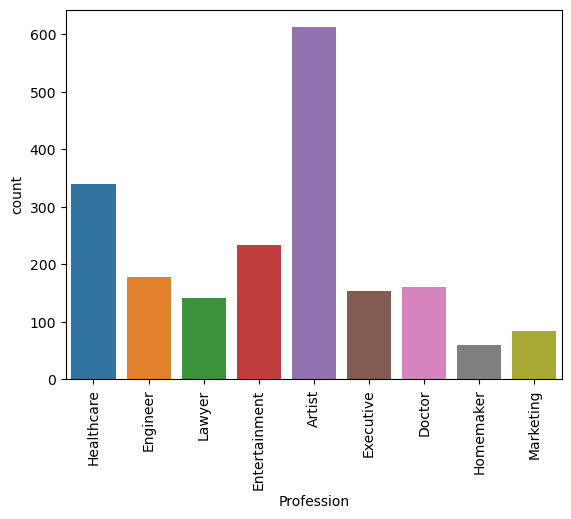

In [12]:
sns.countplot(x='Profession',data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Family Size', ylabel='count'>

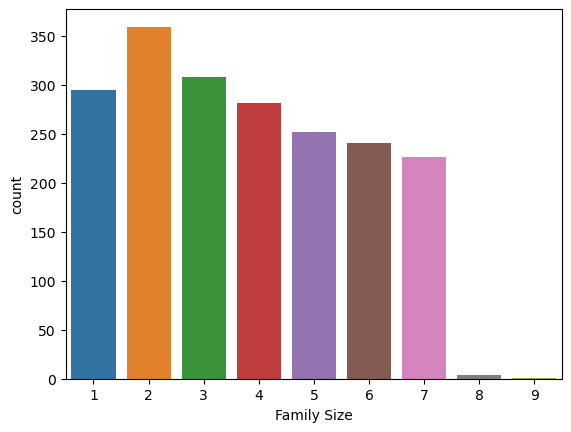

In [13]:
sns.countplot(x='Family Size',data=df)

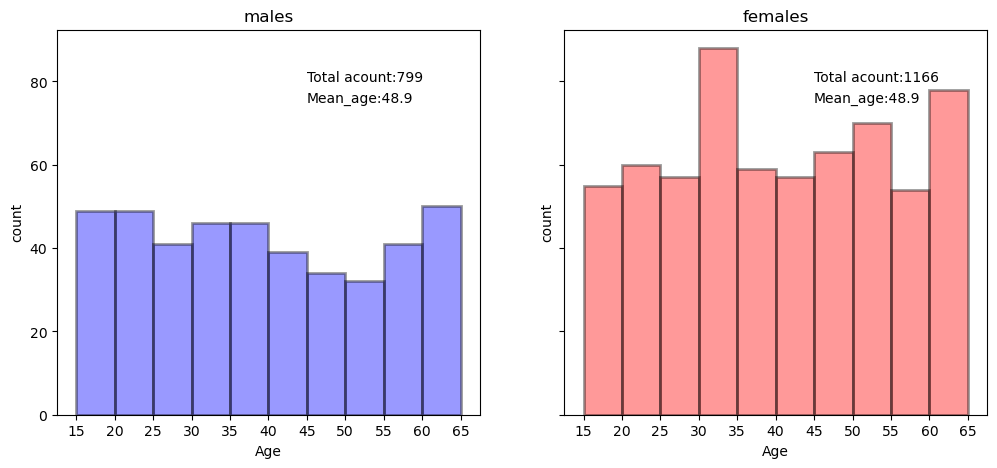

In [14]:
males_age=df[df['Gender']=='Male']['Age']
females_age=df[df['Gender']=='Female']['Age']
age_bins=range(15,70,5)
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.distplot(males_age,bins=age_bins,kde=False,color='blue',ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_title('males')
ax1.set_ylabel('count')
ax1.text(45,80,'Total acount:{}'.format(males_age.count()))
ax1.text(45,75,'Mean_age:{:.1f}'.format(males_age.mean()))
sns.distplot(females_age,bins=age_bins,kde=False,color='red',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('females')
ax2.set_ylabel('count')
ax2.text(45,80,'Total acount:{}'.format(females_age.count()))
ax2.text(45,75,'Mean_age:{:.1f}'.format(females_age.mean()))
plt.show()

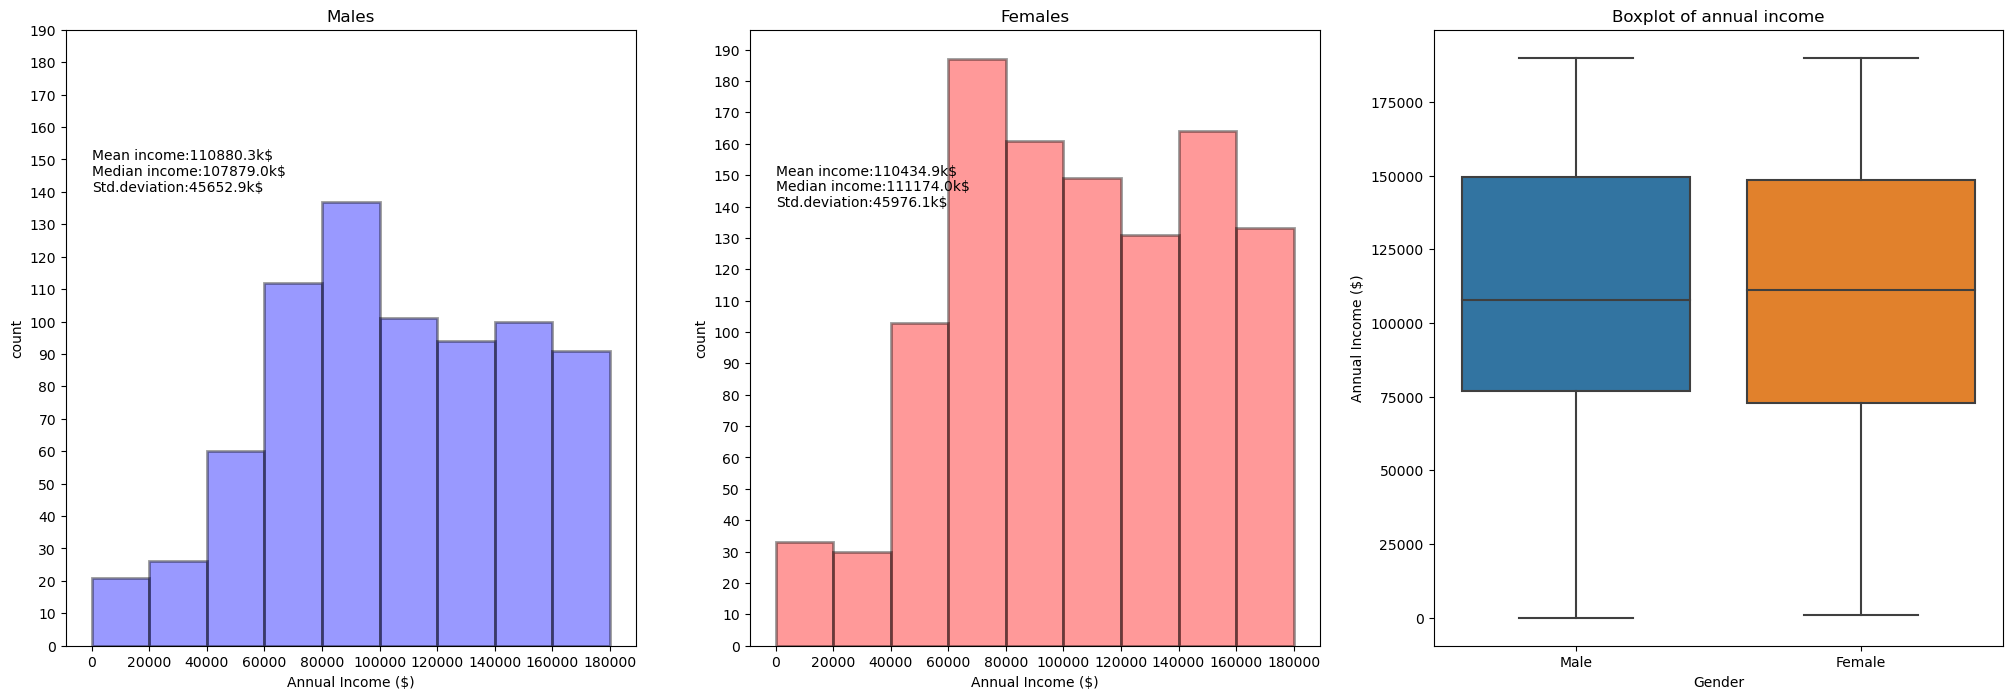

In [15]:
males_income=df[df['Gender']=='Male']['Annual Income ($)']
females_income=df[df['Gender']=='Female']['Annual Income ($)']
my_bins=range(0,190000,20000)
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,8))
sns.distplot(males_income,bins=my_bins,kde=False,color='blue',ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,200,10))
ax1.set_title('Males')
ax1.set_ylabel('count')
ax1.text(0,150,'Mean income:{:.1f}k$'.format(males_income.mean()))
ax1.text(0,145,'Median income:{:.1f}k$'.format(males_income.median()))
ax1.text(0,140,'Std.deviation:{:.1f}k$'.format(males_income.std()))
sns.distplot(females_income,bins=my_bins,kde=False,color='red',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,200,10))
ax2.set_title('Females')
ax2.set_ylabel('count')
ax2.text(0,150,'Mean income:{:.1f}k$'.format(females_income.mean()))
ax2.text(0,145,'Median income:{:.1f}k$'.format(females_income.median()))
ax2.text(0,140,'Std.deviation:{:.1f}k$'.format(females_income.std()))
sns.boxplot(x='Gender',y='Annual Income ($)',data=df,ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

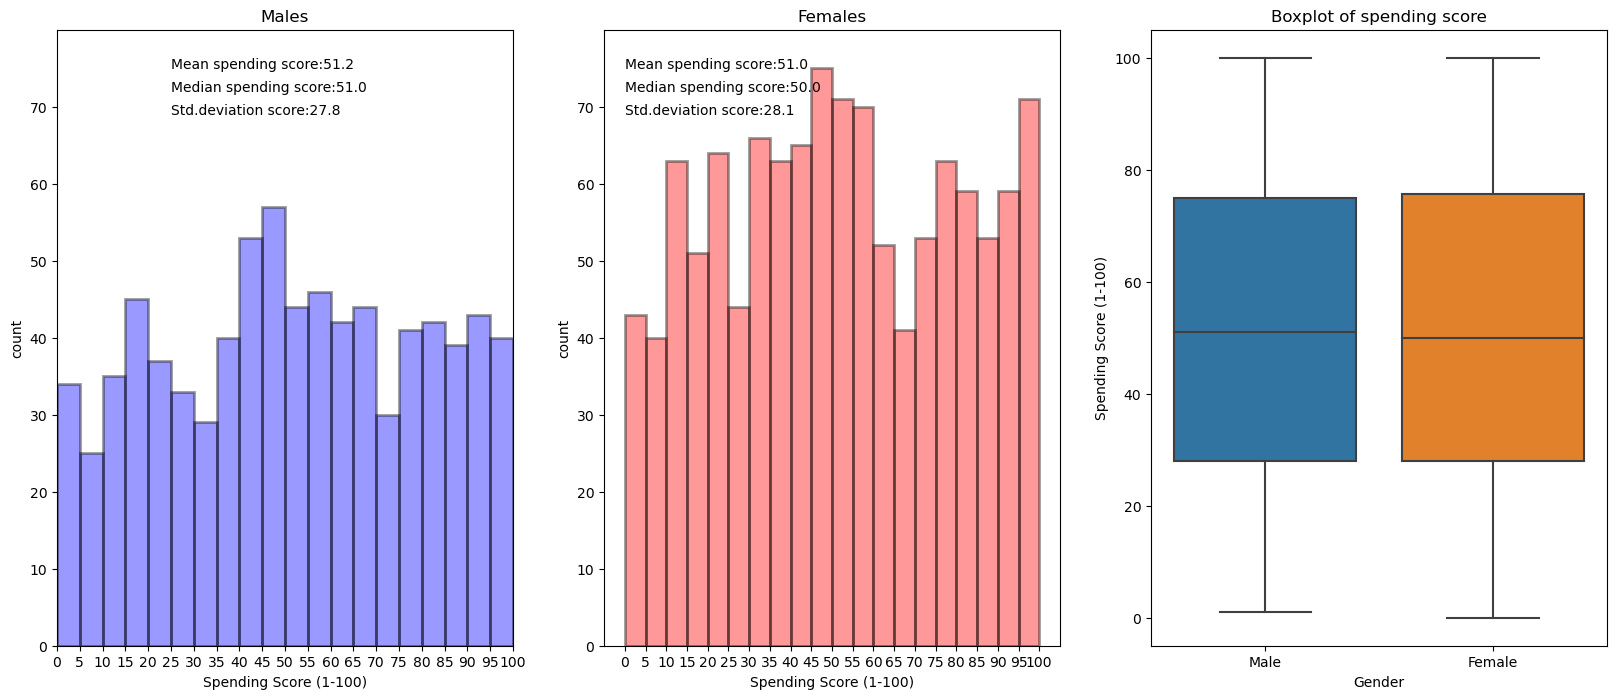

In [16]:
males_spending=df[df['Gender']=='Male']['Spending Score (1-100)']
females_spending=df[df['Gender']=='Female']['Spending Score (1-100)']
spending_bins=range(0,105,5)
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,8))
sns.distplot(males_spending,bins=spending_bins,kde=False,color='blue',ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,80,10))
ax1.set_ylim(0,80)
ax1.set_title('Males')
ax1.set_ylabel('count')
ax1.text(25,75,'Mean spending score:{:.1f}'.format(males_spending.mean()))
ax1.text(25,72,'Median spending score:{:.1f}'.format(males_spending.median()))
ax1.text(25,69,'Std.deviation score:{:.1f}'.format(males_spending.std()))
sns.distplot(females_spending,bins=spending_bins,kde=False,color='red',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))
ax2.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax2.set_yticks(range(0,80,10))
ax2.set_ylim(0,80)
ax2.set_title('Females')
ax2.set_ylabel('count')
ax2.text(0,75,'Mean spending score:{:.1f}'.format(females_spending.mean()))
ax2.text(0,72,'Median spending score:{:.1f}'.format(females_spending.median()))
ax2.text(0,69,'Std.deviation score:{:.1f}'.format(females_spending.std()))
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df,ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

In [17]:
from scipy.stats import pearsonr

<Figure size 3000x1200 with 0 Axes>

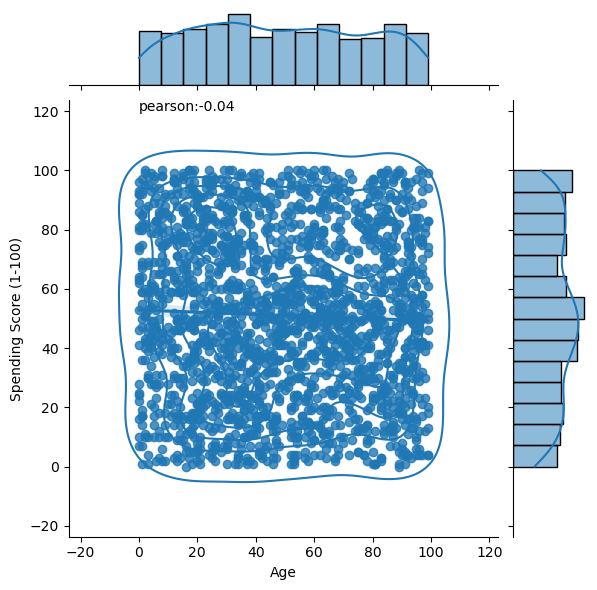

In [18]:
plt.figure(figsize=(30,12))
corr,_=pearsonr(df['Age'],df['Spending Score (1-100)'])
jp=(sns.jointplot(x='Age',y='Spending Score (1-100)',data=df,kind='reg')).plot_joint(sns.kdeplot,zorder=0,n_levels=6)
plt.text(0,120,'pearson:{:.2f}'.format(corr))
plt.show()

# visualizing pearson's correlation

<Figure size 3000x1200 with 0 Axes>

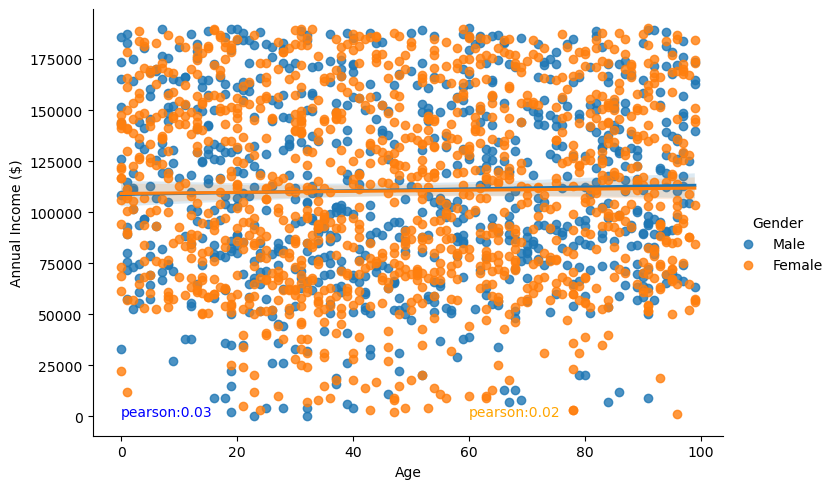

In [19]:
corr1,_=pearsonr(males_age.values,males_income.values)
plt.figure(figsize=(30,12))
corr2,_=pearsonr(females_age.values,females_income.values)
sns.lmplot(x='Age',y='Annual Income ($)',data=df,hue='Gender',aspect=1.5)
plt.text(0,87,'pearson:{:.2f}'.format(corr1),color='blue')
plt.text(60,20,'pearson:{:.2f}'.format(corr2),color='orange')
plt.show()

**there is no correlation between age and annual income**

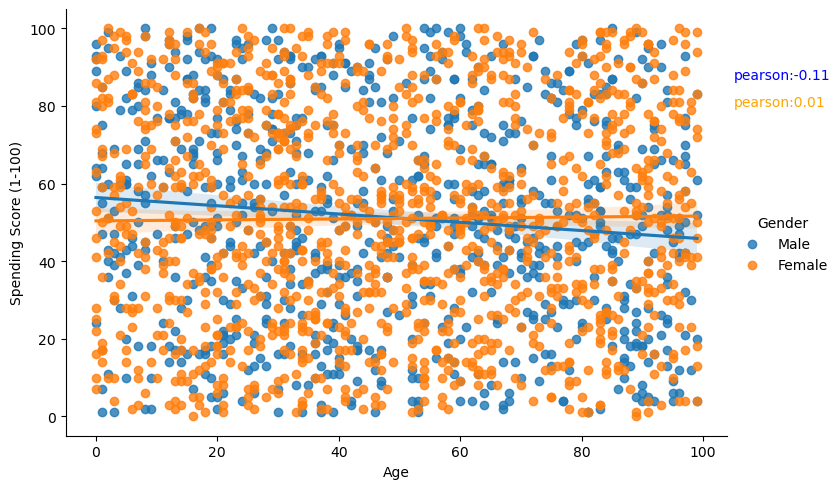

In [20]:
corr1,_=pearsonr(males_age.values,males_spending.values)
corr2,_=pearsonr(females_age.values,females_spending.values)
sns.lmplot(x='Age',y='Spending Score (1-100)',data=df,hue='Gender',aspect=1.5)
plt.text(105,87,'pearson:{:.2f}'.format(corr1),color='blue')
plt.text(105,80,'pearson:{:.2f}'.format(corr2),color='orange')
plt.show()

**there is no correlation between age and spending**

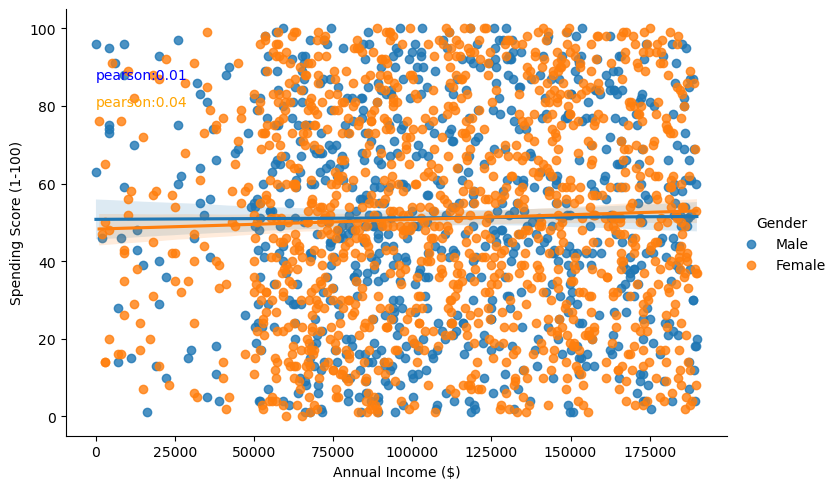

In [21]:
corr1,_=pearsonr(males_income.values,males_spending.values)
corr2,_=pearsonr(females_income.values,females_spending.values)
sns.lmplot(x='Annual Income ($)',y='Spending Score (1-100)',data=df,hue='Gender',aspect=1.5)
plt.text(15,87,'pearson:{:.2f}'.format(corr1),color='blue')
plt.text(65,80,'pearson:{:.2f}'.format(corr2),color='orange')
plt.show()

**there is no correlation between age and spending**

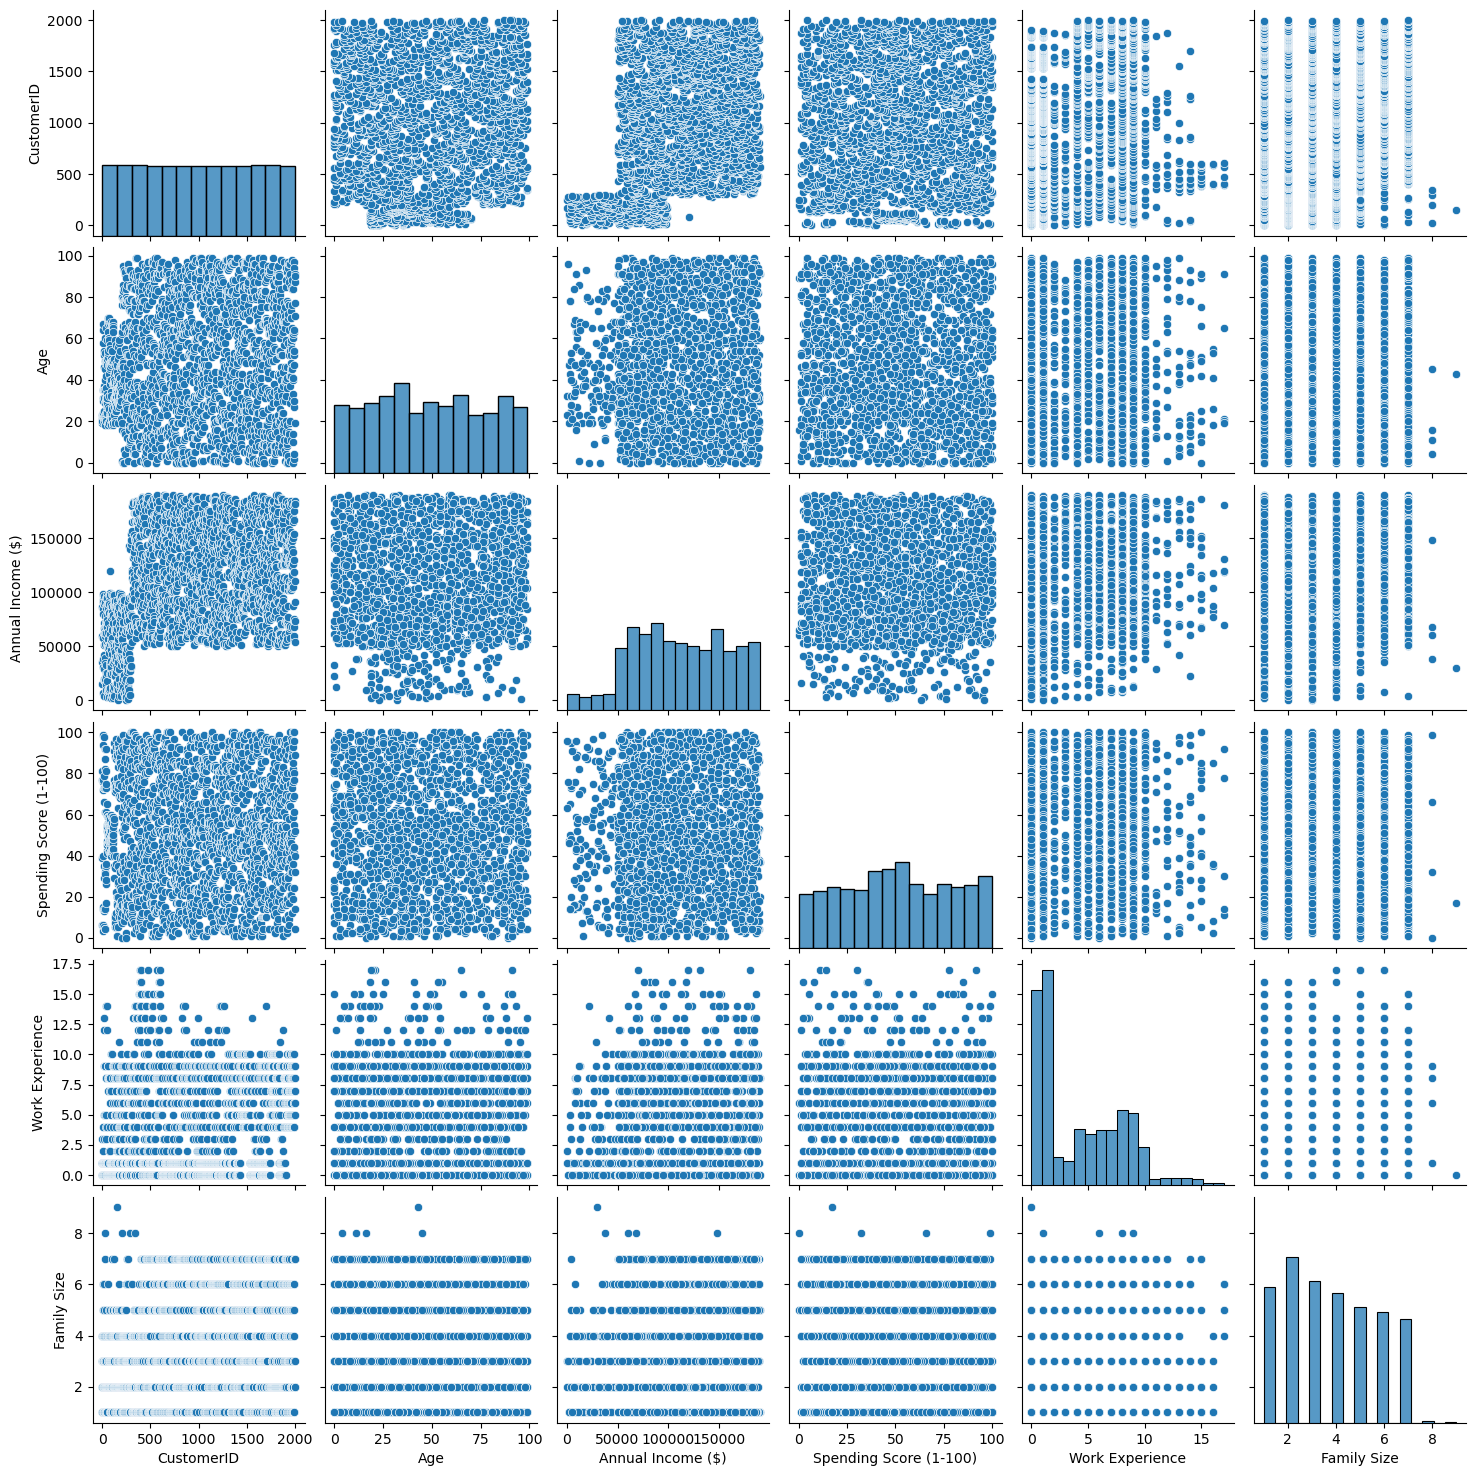

In [22]:
sns.pairplot(df)

# data correlations

In [23]:
df.corr()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
CustomerID,1.000000,0.074915,0.329822,0.014387,0.092284,0.163545
Age,0.074915,1.000000,0.021064,-0.037387,-0.016771,0.034810
Annual Income ($),0.329822,0.021064,1.000000,0.026716,0.087135,0.093757
Spending Score (1-100),0.014387,-0.037387,0.026716,1.000000,-0.025587,0.005859
Work Experience,0.092284,-0.016771,0.087135,-0.025587,1.000000,0.012727
Family Size,0.163545,0.034810,0.093757,0.005859,0.012727,1.000000


<AxesSubplot:>

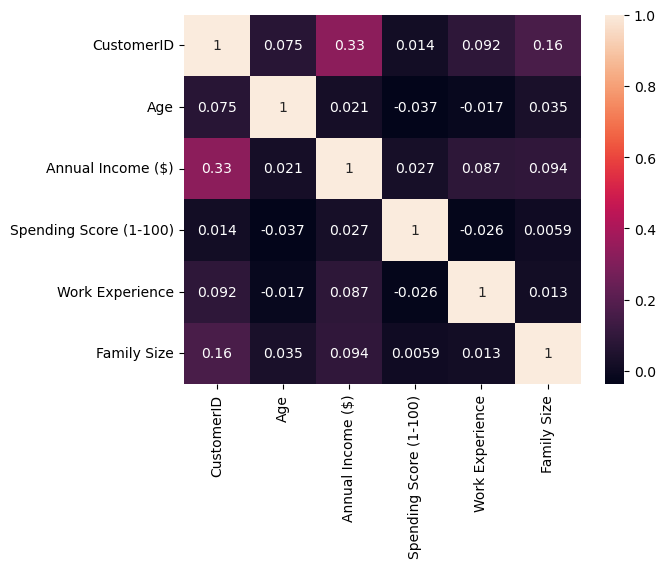

In [24]:
sns.heatmap(df.corr(),annot=True)

# as we see there is no correlation between any features

# clustering

* **KMeans**

In [25]:
from sklearn.cluster import KMeans

In [26]:
data=df[['Age','Annual Income ($)','Spending Score (1-100)','Family Size','Work Experience']]

In [27]:
data.shape

(1965, 5)

In [28]:
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8,9]
clusters_inertia=[]
s_scores=[]
for n in n_clusters:
    KM_est=KMeans(n_clusters=n,init='k-means++').fit(data)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg=silhouette_score(data,KM_est.labels_)
    s_scores.append(silhouette_avg)

# using Elbow graph to calculate the clusters number

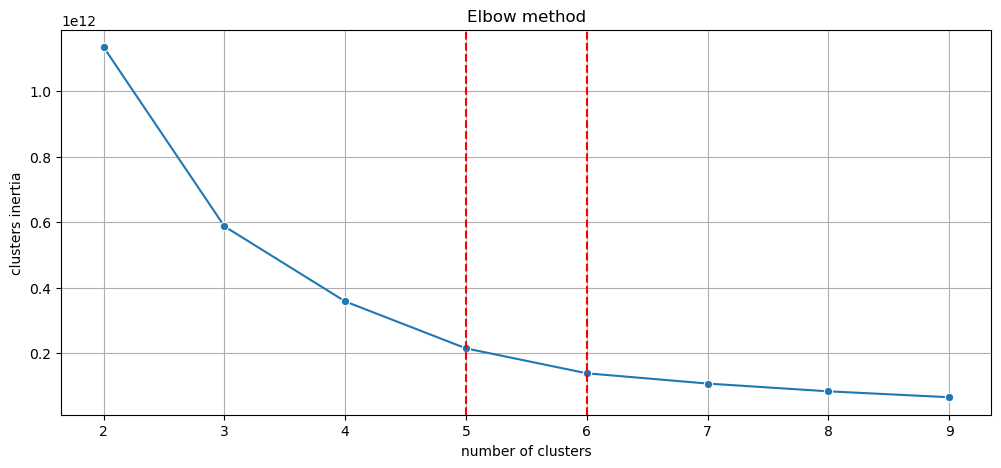

In [29]:
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.lineplot(x=n_clusters,y=clusters_inertia,marker='o',ax=ax)
ax.set_title('Elbow method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('clusters inertia')
ax.axvline(5,ls='--',c='red')
ax.axvline(6,ls='--',c='red')
plt.grid()
plt.show()

*** the n_clusters will be 5 or 6**
 
*** we will use 6 clusters**

In [30]:
km_6_clusters=KMeans(n_clusters=6,init='k-means++').fit(data)
km6_clusters=data.copy()
km6_clusters.loc[:,'Cluster']=km_6_clusters.labels_

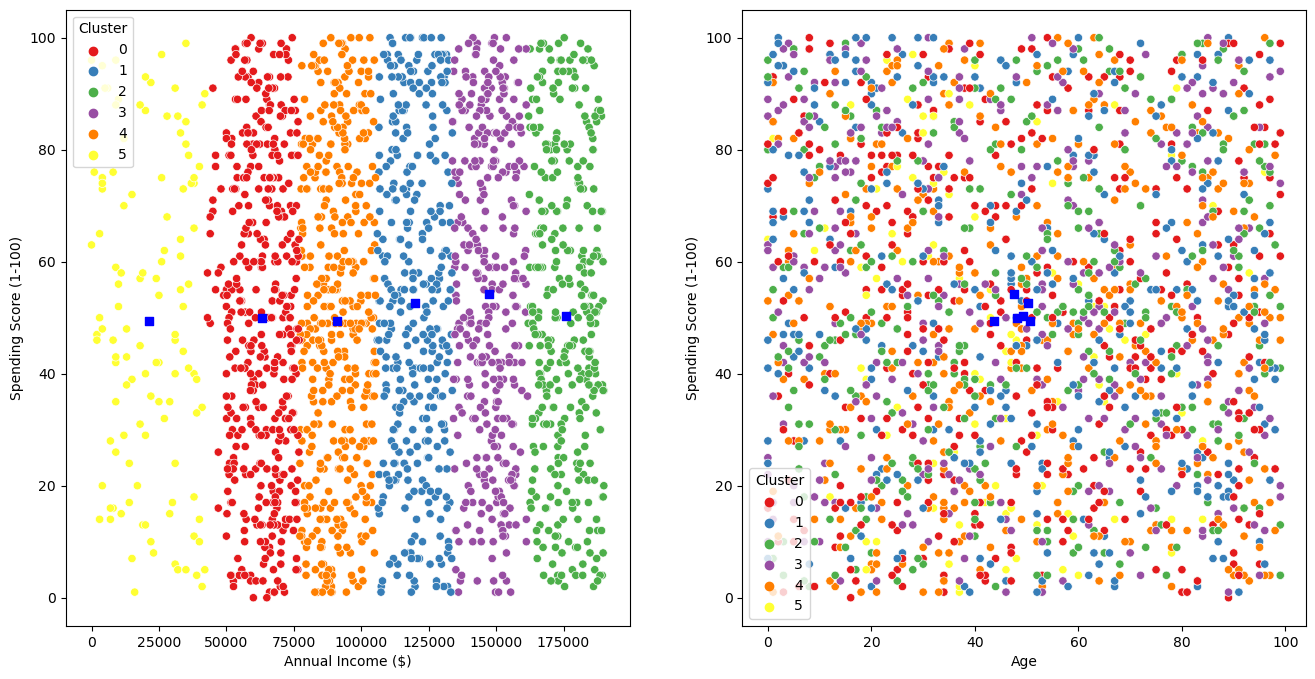

In [31]:
fig1,(axes)=plt.subplots(1,2,figsize=(16,8))
scat_1=sns.scatterplot(x='Annual Income ($)',y='Spending Score (1-100)',data=km6_clusters,hue='Cluster',ax=axes[0],palette='Set1',legend='full')
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=km6_clusters,hue='Cluster',ax=axes[1],palette='Set1',legend='full')
axes[0].scatter(km_6_clusters.cluster_centers_[:,1],km_6_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
axes[1].scatter(km_6_clusters.cluster_centers_[:,0],km_6_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
plt.show()

* cluster 0 clients with average annual income from 0 to almost 48000 $.
* cluster 1 clients with average annual income from 48000 to almost 76000 $.
* cluster 2 clients with average annual income from 48000 to almost 105000 $.
* cluster 3 clients with average annual income from 105000 to almost 138000  $.
* cluster 4 clients with average annual income from 138000 to almost 166000 $.
* cluster 5 clients with average annual income from 16000 to almost 190000 $.
# and all the clients don't have any fixed spending score.

**for the age there is no correlations with annual income or spending score so there is no obvious clustering.**

In [32]:
km6_cluster_sizes=km6_clusters.groupby('Cluster').size().to_frame()
km6_cluster_sizes.columns=['KM6_size']
km6_cluster_sizes

,KM6_size
Cluster,
0,414
1,339
2,344
3,341
4,409
5,118


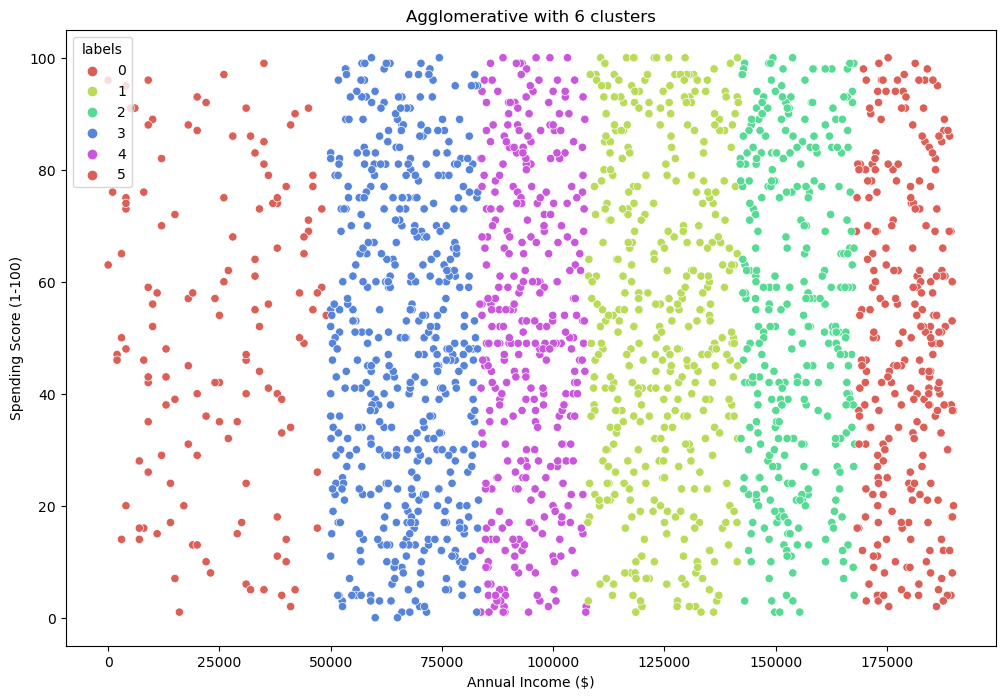

In [33]:
from sklearn.cluster import AgglomerativeClustering
agglom=AgglomerativeClustering(n_clusters=6,linkage='average').fit(data)
data['labels']=agglom.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x='Annual Income ($)',y='Spending Score (1-100)',hue=data['labels'],data=data,palette=sns.color_palette('hls',5))
plt.title('Agglomerative with 6 clusters')
plt.show()

In [34]:
agg_clustered=data.copy()
agg_clustered.loc[:,'Cluster']=agglom.labels_

In [35]:
agg_clust_sizes=agg_clustered.groupby('Cluster').size().to_frame()
agg_clust_sizes.columns=['agg_size']
agg_clust_sizes

,agg_size
Cluster,
0,135
1,406
2,334
3,481
4,345
5,264


In [36]:
clusters=pd.concat([km6_cluster_sizes,agg_clust_sizes],axis=1,sort=False)
clusters

,KM6_size,agg_size
Cluster,,
0,414,135
1,339,406
2,344,334
3,341,481
4,409,345
5,118,264


# at the end my recommendations are we need more data to have a better clustering for other features.